# Image Analysis with Python

In [62]:
# Import modules
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')

In [5]:
# One-dimnesional array
A = np.array([1,2,3])
print(A.shape)
print(type(A))

(3,)
<class 'numpy.ndarray'>


In [16]:
# Two-dimensional array
B = np.array([ [1,2,3], [4,5,6] ])
print(B.shape)
B

(2, 3)


array([[1, 2, 3],
       [4, 5, 6]])

In [19]:
# Three-dimensional array
C = np.zeros([5,5,3])
print(C.shape)
C

(5, 5, 3)


array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]])

In [20]:
D = np.array([1])
E = [1]

print(type(D))
print(type(E))

<class 'numpy.ndarray'>
<class 'list'>


In [21]:
# Read an image
RGB = plt.imread('soybeans_20200819_090000.jpg')

In [24]:
# Image dimensions
print(RGB.shape)
print(RGB.size)

(1920, 2560, 3)
14745600


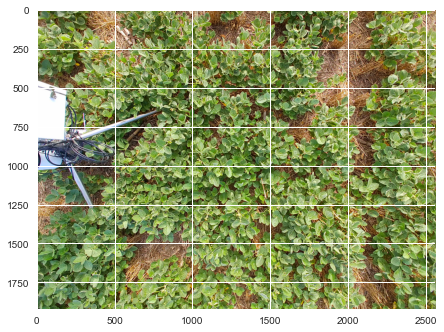

In [63]:
plt.figure()
plt.imshow(RGB)
plt.show()

In [30]:
# Slicing
RGB[0,0,:]

array([184, 207, 127], dtype=uint8)

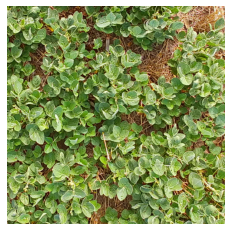

In [36]:
# Select a pacth
RGB_patch = RGB[500:1500, 1000:2000, :]

plt.figure()
plt.imshow(RGB_patch)
plt.axis('off')
plt.show()

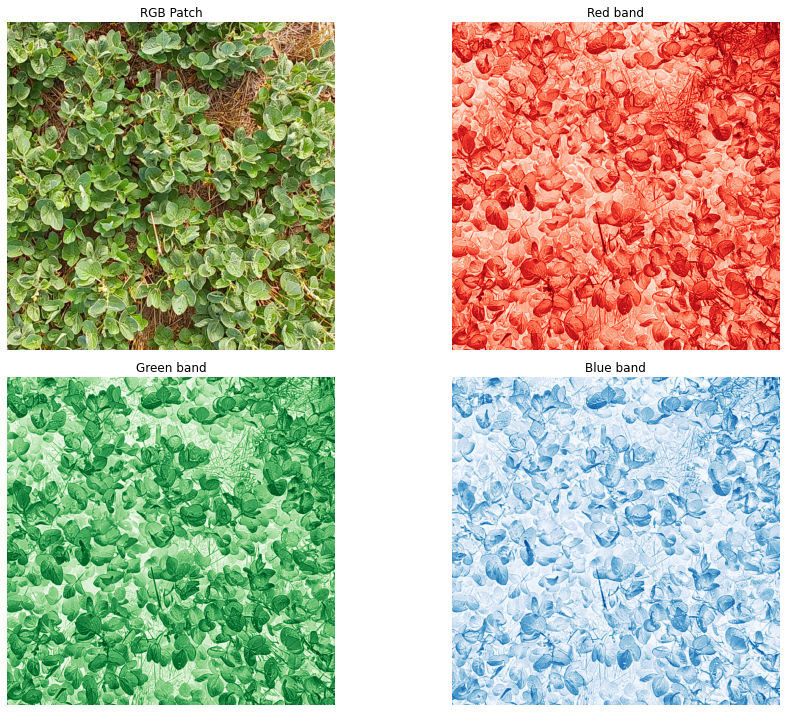

In [44]:
# Display separate bands
plt.figure(figsize=(14,10))

plt.subplot(2,2,1)
plt.imshow(RGB_patch)
plt.title('RGB Patch')
plt.axis('off')

plt.subplot(2,2,2)
plt.imshow(RGB_patch[:,:,0], cmap='Reds')
plt.title('Red band')
plt.axis('off')

plt.subplot(2,2,3)
plt.imshow(RGB_patch[:,:,1], cmap='Greens')
plt.title('Green band')
plt.axis('off')

plt.subplot(2,2,4)
plt.imshow(RGB_patch[:,:,2], cmap='Blues')
plt.title('Blue band')
plt.axis('off')

plt.tight_layout()
plt.savefig('mosaic.jpg', dpi=300)
plt.show()

In [45]:
type(RGB_patch[0,0,0]) 0-255 (256 possibilities)

numpy.uint8

In [46]:
# Convert UINT8 to Floating point
R = np.float32(RGB_patch[:,:,0]) # Red band
G = np.float32(RGB_patch[:,:,1]) # Green band
B = np.float32(RGB_patch[:,:,2]) # Blue band

In [52]:
B.max()

255.0

In [50]:
RG_ratio = R/G # Red to green ratio
BG_ratio = B/G # Blue to green ratio
ExG = 2*G - R - B # Excess green

<ipython-input-50-87a803308bfc>:1: RuntimeWarning: divide by zero encountered in true_divide
  RG_ratio = R/G # Red to green ratio
<ipython-input-50-87a803308bfc>:2: RuntimeWarning: invalid value encountered in true_divide
  BG_ratio = B/G # Blue to green ratio


In [53]:
RG_ratio.max()

inf

In [54]:
placehold_inf = 10
RG_ratio = np.where(np.isinf(RG_ratio), placehold_inf, RG_ratio)
BG_ratio = np.where(np.isinf(BG_ratio), placehold_inf, BG_ratio)

In [56]:
RG_ratio.shape

(1000, 1000)

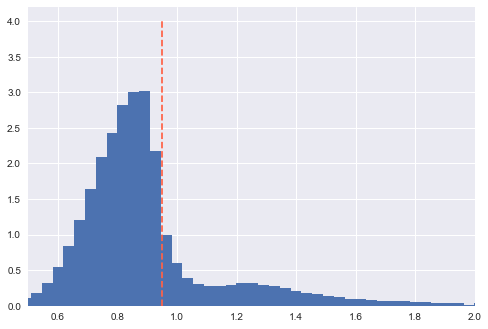

In [65]:
plt.figure()
plt.hist(RG_ratio.flatten(), bins='scott', density=True)
plt.xlim(0.5, 2)
plt.vlines(0.95, ymin=0, ymax=4, color='tomato', linestyles='dashed')
plt.show()

In [69]:
# Quantify green canopy cover
BW = np.logical_and(RG_ratio < 0.95, BG_ratio < 0.95, ExG > 20)

In [68]:
BW

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True],
       [False, False, False, ...,  True,  True,  True]])

In [70]:
# Percentage of canopy cover
canopy_cover = np.sum(BW.flatten()) / BW.size * 100
print(canopy_cover)

75.7195


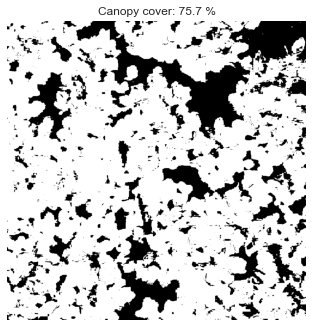

In [80]:
# Black and white image
plt.figure()
plt.imshow(BW, cmap='binary_r')
plt.axis('off')
plt.title( 'Canopy cover: ' + str(round(canopy_cover,1)) + ' %' )
plt.show()


In [95]:
# Define function
np.seterr(divide='ignore', invalid='ignore')

def canopeo(img, RG=0.95):
    """ Function that computes the percentage of canopy cover
    The input is an RGB image.
    The output is the percentage of green canopy.
    AP - 28-April-2021"""
    placehold_inf = 10

    RG_ratio = img[:,:,0] / img[:,:,1]
    RG_ratio = np.where(np.isinf(RG_ratio), placehold_inf, RG_ratio)

    BG_ratio = img[:,:,2] / img[:,:,1]
    BG_ratio = np.where(np.isinf(BG_ratio), placehold_inf, BG_ratio)

    ExG = 2*img[:,:,1] - img[:,:,0] - img[:,:,2]
    BW = np.logical_and(RG_ratio < RG, BG_ratio < 0.95, ExG > 20)
    canopy_cover = np.sum(BW.flatten()) / BW.size * 100
    return canopy_cover


In [94]:
# Call a function (invoking)
print(canopeo(RGB))
print(canopeo(RGB_patch))

66.31870524088541
75.7195


In [97]:
print(canopeo(RGB))
print(canopeo(RGB, 1.0))


66.31870524088541
70.91099039713542


In [109]:
import glob
import pandas as pd

filenames = glob.glob('*.jpg')
print(filenames)

['soybeans_20200819_090000.jpg', 'soybeans_20200819_120000.jpg', 'soybeans_20200819_150000.jpg', 'soybeans_20200819_180000.jpg']


In [112]:
CC = {'filename':[], 'timestamp':[], 'cover':[]}

for file in filenames:
    I = plt.imread(file)
    CC['filename'].append(file)
    CC['cover'].append(canopeo(I))
    file_no_ext = file.split('.')
    file_no_ext_parts = file_no_ext[0].split('_')
    timestamp_str = file_no_ext_parts[1] + file_no_ext_parts[2]
    timestamp = pd.to_datetime(timestamp_str, format='%Y%m%d%H%M%S')
    CC['timestamp'].append(timestamp)

print(CC)


{'filename': ['soybeans_20200819_090000.jpg', 'soybeans_20200819_120000.jpg', 'soybeans_20200819_150000.jpg', 'soybeans_20200819_180000.jpg'], 'timestamp': [Timestamp('2020-08-19 09:00:00'), Timestamp('2020-08-19 12:00:00'), Timestamp('2020-08-19 15:00:00'), Timestamp('2020-08-19 18:00:00')], 'cover': [66.31870524088541, 54.36971028645833, 43.13808186848958, 61.127095540364586]}


In [113]:
df = pd.DataFrame(CC)
df.head()

,filename,timestamp,cover
0,soybeans_20200819_090000.jpg,2020-08-19 09:00:00,66.318705
1,soybeans_20200819_120000.jpg,2020-08-19 12:00:00,54.369710
2,soybeans_20200819_150000.jpg,2020-08-19 15:00:00,43.138082
3,soybeans_20200819_180000.jpg,2020-08-19 18:00:00,61.127096
